# Motivation

Wind power is growing worldwide as a major source of renewable energy.  To meet the demand for alternative energy sources, large numbers of wind power generators are being deployed on wind farms both at land and sea. In the US, wind power generation has doubled in the last two years to more than 20 gigawatts, and recently passed Germany as the world leader in wind energy generation. Even with these strides,  wind power currently provides less than 2% of the US electricity supply.  However, government forecasts optimistically call for wind power to provide 20% of the nation’s electricity by 2030.

Advantages of Wind Power:

Wind power offers many advantages, which explains why it's the fastest-growing energy source in the world, for instance: 

1. Wind energy is fueled by the wind, so it's a clean fuel source. Wind energy doesn't pollute the air like power plants that rely on combustion of fossil fuels, such as coal or natural gas. Wind turbines don't produce atmospheric emissions that cause acid rain or greenhouse gasses.

2. Wind energy is a domestic source of energy.

3. Wind energy relies on the renewable power of the wind, which can't be used up.

4. Wind energy is one of the lowest-priced renewable energy technologies available today, costing between 4 and 6 cents per kilowatt-hour, depending upon the wind resource and project financing of the particular project.

5. Wind turbines can be built on farms or ranches, thus benefiting the economy in rural areas, where most of the best wind sites are found. Farmers and ranchers can continue to work the land because the wind turbines use only a fraction of the land. Wind power plant owners make rent payments to the farmer or rancher for the use of the land.

reference: https://www.dasolar.com/wind-power

# Prolem Statement 

This was a Kaggle competition, find more information on: https://www.kaggle.com/c/GEF2012-wind-forecasting

Here is a summary:

The topic for the wind forecasting track is focused on mimicking the operation 48-hour ahead prediction of hourly power generation at 7 wind farms, based on historical measurements and additional wind forecast information (48-hour ahead predictions of wind speed and direction at the sites). The data is available for period ranging from the 1st hour of 2009/7/1 to the 12th hour of 2012/6/28.

The period between 2009/7/1 and 2010/12/31 is a model identification and training period, while the remainder of the dataset, that is, from 2011/1/1 to 2012/6/28, is there for the evaluation. The training period is there to be used for designing and estimating models permiting to predicting wind power generation at lead times from 1 to 48 hours ahead, based on past power observations and/or available meteorological wind forecasts for that period. Over the evaluation part, it is aimed at mimicking real operational conditions. For that, a number of 48-hour periods with missing power observations where defined. All these power observations are to be predicted. These periods are defined as following. The first period with missing observations is that from 2011/1/1 at 01:00 until 2011/1/3 at 00:00. The second period with missing observations is that from 2011/1/4 at 13:00 until 2011/1/6 at 12:00. Note that to be consistent, only the meteorological forecasts for that period that would actually be available in practice are given. These two periods then repeats every 7 days until the end of the dataset. Inbetween periods with missing data, power observations are available for updating the models.



# Major steps followed in this notebook:
 1. Preparining training and test data sets (e.g., normalizing data, defining features)
 2. Developing model
 3. Testing Model 

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn import base
from sklearn.neighbors import KNeighborsRegressor

# Read and Pre-process Data

In [2]:
train = pd.read_csv('train.csv')
wf1 = pd.read_csv('windforecasts_wf1.csv')
wf2 = pd.read_csv('windforecasts_wf2.csv')
wf3 = pd.read_csv('windforecasts_wf3.csv')
wf4 = pd.read_csv('windforecasts_wf4.csv')
wf5 = pd.read_csv('windforecasts_wf5.csv')
wf6 = pd.read_csv('windforecasts_wf6.csv')
wf7 = pd.read_csv('windforecasts_wf7.csv')

In [3]:
wf1.head()

,date,hors,u,v,ws,wd
0,2009070100,1,2.34,-0.79,2.47,108.68
1,2009070100,2,2.18,-0.99,2.40,114.31
2,2009070100,3,2.20,-1.21,2.51,118.71
3,2009070100,4,2.35,-1.40,2.73,120.86
4,2009070100,5,2.53,-1.47,2.93,120.13


## Covert date to datetime format

In [4]:
train['date'] = pd.to_datetime(train['date'], format='%Y%m%d%H', errors='ignore')

In [5]:
wf1['date'] = pd.to_datetime(wf1['date'], format='%Y%m%d%H', errors='ignore') + pd.to_timedelta(wf1['hors'], unit = 'h')
wf2['date'] = pd.to_datetime(wf2['date'], format='%Y%m%d%H', errors='ignore') + pd.to_timedelta(wf2['hors'], unit = 'h')
wf3['date'] = pd.to_datetime(wf3['date'], format='%Y%m%d%H', errors='ignore') + pd.to_timedelta(wf3['hors'], unit = 'h')
wf4['date'] = pd.to_datetime(wf4['date'], format='%Y%m%d%H', errors='ignore') + pd.to_timedelta(wf4['hors'], unit = 'h')
wf5['date'] = pd.to_datetime(wf5['date'], format='%Y%m%d%H', errors='ignore') + pd.to_timedelta(wf5['hors'], unit = 'h')
wf6['date'] = pd.to_datetime(wf6['date'], format='%Y%m%d%H', errors='ignore') + pd.to_timedelta(wf6['hors'], unit = 'h')
wf7['date'] = pd.to_datetime(wf7['date'], format='%Y%m%d%H', errors='ignore') + pd.to_timedelta(wf7['hors'], unit = 'h')


In [6]:
wf1.head()

,date,hors,u,v,ws,wd
0,2009-07-01 01:00:00,1,2.34,-0.79,2.47,108.68
1,2009-07-01 02:00:00,2,2.18,-0.99,2.40,114.31
2,2009-07-01 03:00:00,3,2.20,-1.21,2.51,118.71
3,2009-07-01 04:00:00,4,2.35,-1.40,2.73,120.86
4,2009-07-01 05:00:00,5,2.53,-1.47,2.93,120.13


## Read until 2011/1/1 where full data are available 

In [7]:
train = train[0:13176]
wf1 = wf1[0:52559]
wf2 = wf2[0:52559]
wf3 = wf3[0:52559]
wf4 = wf4[0:52559]
wf5 = wf5[0:52559]
wf6 = wf6[0:52559]
wf7 = wf7[0:52559]

## Since there are several values for a specific date and time, we decided to groupby the values 

In [8]:
wf1 = wf1.groupby(['date']).mean()
wf2 = wf2.groupby(['date']).mean()
wf3 = wf3.groupby(['date']).mean()
wf4 = wf4.groupby(['date']).mean()
wf5 = wf5.groupby(['date']).mean()
wf6 = wf6.groupby(['date']).mean()
wf7 = wf7.groupby(['date']).mean()

In [9]:
wf1.head()

,hors,u,v,ws,wd
date,,,,,
2009-07-01 01:00:00,1,2.34,-0.79,2.47,108.68
2009-07-01 02:00:00,2,2.18,-0.99,2.40,114.31
2009-07-01 03:00:00,3,2.20,-1.21,2.51,118.71
2009-07-01 04:00:00,4,2.35,-1.40,2.73,120.86
2009-07-01 05:00:00,5,2.53,-1.47,2.93,120.13


## In the next few cells we are trying to organize training datasets for each wind farm, some steps might seem too long!

In [10]:
train1 = pd.DataFrame(columns=['date','WF','Energy'])
train2 = pd.DataFrame(columns=['date','WF','Energy'])
train3 = pd.DataFrame(columns=['date','WF','Energy'])
train4 = pd.DataFrame(columns=['date','WF','Energy'])
train5 = pd.DataFrame(columns=['date','WF','Energy'])
train6 = pd.DataFrame(columns=['date','WF','Energy'])
train7 = pd.DataFrame(columns=['date','WF','Energy'])

train1['date']=train['date']
train1['Energy']=train['wp1']
train1['WF']=1

train2['date']=train['date']
train2['Energy']=train['wp2']
train2['WF']=2

train3['date']=train['date']
train3['Energy']=train['wp3']
train3['WF']=3

train4['date']=train['date']
train4['Energy']=train['wp4']
train4['WF']=4

train5['date']=train['date']
train5['Energy']=train['wp5']
train5['WF']=5

train6['date']=train['date']
train6['Energy']=train['wp6']
train6['WF']=6

train7['date']=train['date']
train7['Energy']=train['wp7']
train7['WF']=7

In [11]:
s1 = wf1.join(train1.set_index('date'), on='date')
s2 = wf2.join(train2.set_index('date'), on='date')
s3 = wf3.join(train3.set_index('date'), on='date')
s4 = wf4.join(train4.set_index('date'), on='date')
s5 = wf5.join(train5.set_index('date'), on='date')
s6 = wf6.join(train6.set_index('date'), on='date')
s7 = wf7.join(train7.set_index('date'), on='date')

In [12]:
s1 = s1[[ 'Energy','WF',  'u', 'v','ws','wd']].dropna()
s2 = s2[[ 'Energy','WF',  'u', 'v','ws','wd']].dropna()
s3 = s3[[ 'Energy','WF',  'u', 'v','ws','wd']].dropna()
s4 = s4[[ 'Energy','WF',  'u', 'v','ws','wd']].dropna()
s5 = s5[[ 'Energy','WF',  'u', 'v','ws','wd']].dropna()
s6 = s6[[ 'Energy','WF',  'u', 'v','ws','wd']].dropna()
s7 = s7[[ 'Energy','WF',  'u', 'v','ws','wd']].dropna()

### We normalized data to make sure all values fall between 0 and 1

In [13]:
s1.ws = s1.ws/s1.ws.max()
s1.wd = s1.wd/s1.wd.max()
s2.ws = s2.ws/s2.ws.max()
s2.wd = s2.wd/s2.wd.max()
s3.ws = s3.ws/s3.ws.max()
s3.wd = s3.wd/s3.wd.max()
s4.ws = s4.ws/s4.ws.max()
s4.wd = s4.wd/s4.wd.max()
s5.ws = s5.ws/s5.ws.max()
s5.wd = s5.wd/s5.wd.max()
s6.ws = s6.ws/s6.ws.max()
s6.wd = s6.wd/s6.wd.max()
s7.ws = s7.ws/s7.ws.max()
s7.wd = s7.wd/s7.wd.max()

## We identified that the mean energy production in the last four hours can significantly improve the performance of the model we will show later

In [14]:
s1['mean_energy_last_4_hrs'] = (s1.Energy.rolling(5).sum() - s1.Energy)/4
s2['mean_energy_last_4_hrs'] = (s2.Energy.rolling(5).sum() - s2.Energy)/4
s3['mean_energy_last_4_hrs'] = (s3.Energy.rolling(5).sum() - s3.Energy)/4
s4['mean_energy_last_4_hrs'] = (s4.Energy.rolling(5).sum() - s4.Energy)/4
s5['mean_energy_last_4_hrs'] = (s5.Energy.rolling(5).sum() - s5.Energy)/4
s6['mean_energy_last_4_hrs'] = (s6.Energy.rolling(5).sum() - s6.Energy)/4
s7['mean_energy_last_4_hrs'] = (s7.Energy.rolling(5).sum() - s7.Energy)/4

# Here we concat the training data (tables) created for each wind farm in the previous steps 

In [15]:
frames = [s1.dropna(), s2.dropna(), s3.dropna(), s4.dropna(), s5.dropna(), s6.dropna(), s7.dropna()]
train_new = pd.concat(frames,sort=False)

# The below figure shows the variation of hourly wind energy production 

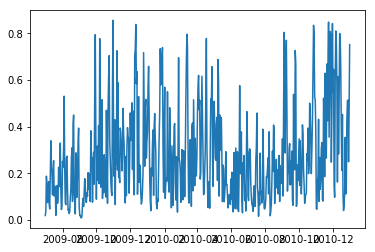

In [16]:
train_new.groupby(train_new.index.date).mean().Energy.plot()

 # Create train and test datasets + add new features
 ## we keep ~75% of data for model training and ~25% of data for testing the model

In [17]:
CUT_YEAR = '2010-8-15'

train_set = train_new[train_new.index < CUT_YEAR]
test_set = train_new[train_new.index >= CUT_YEAR]


In [18]:
train_set.shape[0] / train_new.shape[0] , test_set.shape[0] / train_new.shape[0]

(0.7467162705944879, 0.25328372940551214)

## Since we want to predict hourly wind energy production, thus it seems reasonable to have hour and month as two independent variables. Additionally, we define new features to capture seasonality in our data. We also decided to include mean energy production for each hour for each wind farm and as independent variable

In [19]:
df_train = train_set
df_test = test_set

In [24]:
df_train['Julian'] = df_train.index.to_julian_date()
df_train['sin(day)'] = np.sin(df_train.index.hour / 24.0 * 2* np.pi)
df_train['cos(day)'] = np.cos(df_train.index.hour / 24.0 * 2* np.pi)
df_train['sin(3mo)'] = np.sin(df_train['Julian'] / (365.25 / 4) * 2 * np.pi)
df_train['cos(3mo)'] = np.cos(df_train['Julian'] / (365.25 / 4) * 2 * np.pi)
df_train['hour'] = df_train.index.hour
df_train['month'] = df_train.index.month
df_train['date'] = df_train.index
new_index = [i for i in range(0, df_train.shape[0])]
df_train.index = new_index 


df_test['Julian'] = df_test.index.to_julian_date()
df_test['sin(day)'] = np.sin(df_test.index.hour / 24.0 * 2* np.pi)
df_test['cos(day)'] = np.cos(df_test.index.hour / 24.0 * 2* np.pi)
df_test['sin(3mo)'] = np.sin(df_test['Julian'] / (365.25 / 4) * 2 * np.pi)
df_test['cos(3mo)'] = np.cos(df_test['Julian'] / (365.25 / 4) * 2 * np.pi)
df_test['hour'] = df_test.index.hour
df_test['month'] = df_test.index.month
df_test['date'] = df_test.index
new_index = [i for i in range(0, df_test.shape[0])]
df_test.index = new_index 

In [21]:
group_by_farm_hour_train = df_train.groupby(['hour','WF']).mean()['Energy']
group_by_farm_hour_test = df_test.groupby(['hour','WF']).mean()['Energy']

In [22]:
mean_by_hour_train = pd.DataFrame(group_by_farm_hour_train).rename(columns = {'Energy':'mean_Energy_hour'})
mean_by_hour_test = pd.DataFrame(group_by_farm_hour_test).rename(columns = {'Energy':'mean_Energy_hour'})

In [23]:
df_train = df_train.merge(mean_by_hour_train, left_on=['hour','WF'], right_index=True)
df_test = df_test.merge(mean_by_hour_test, left_on=['hour','WF'], right_index=True)

In [25]:
df_train = df_train.sort_values(['WF', 'date'], ascending=[True, True])
df_test = df_test.sort_values(['WF', 'date'], ascending=[True, True])

# Here is how our training dataset look like

In [26]:
df_train.head()

,Energy,WF,u,v,ws,wd,mean_energy_last_4_hrs,Julian,sin(day),cos(day),sin(3mo),cos(3mo),hour,month,date,mean_Energy_hour
0,0.035,1,2.53,-1.47,0.226299,0.335819,0.05250,2.455014e+06,0.965926,2.588190e-01,-0.827592,0.561330,5,7,2009-07-01 05:00:00,0.239020
1,0.005,1,2.66,-1.29,0.228616,0.323687,0.04000,2.455014e+06,1.000000,6.123234e-17,-0.825979,0.563701,6,7,2009-07-01 06:00:00,0.230995
2,0.000,1,2.69,-0.81,0.217030,0.298304,0.03625,2.455014e+06,0.965926,-2.588190e-01,-0.824360,0.566067,7,7,2009-07-01 07:00:00,0.225363
3,0.000,1,2.72,-0.26,0.210852,0.266659,0.02125,2.455014e+06,0.866025,-5.000000e-01,-0.822733,0.568428,8,7,2009-07-01 08:00:00,0.219527
4,0.010,1,2.87,0.08,0.221664,0.247398,0.01000,2.455014e+06,0.707107,-7.071068e-01,-0.821100,0.570784,9,7,2009-07-01 09:00:00,0.216090


# Let's do modeling 

## In the following two cells we define two classes, the first one  for selecting columns of interest and the second one performs the random forest regression 

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestRegressor

class ColumnSelectTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_names):
        self.col_names = col_names  
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.col_names]

In [28]:
class GroupbyEstimator(base.BaseEstimator, base.RegressorMixin):
    
    def __init__(self, column):
        self.column = column                      
        self.WF_model = dict()                                          
 
    def fit(self, X, y=None):
        for WF, group in X.groupby(self.column):
            group = group.sample(frac=1).reset_index(drop=True)
            MY_FU = []
            MY_FU = FeatureUnion([("cst", ColumnSelectTransformer(['ws','wd','mean_Energy_hour','mean_energy_last_4_hrs','sin(day)','cos(day)','sin(3mo)','cos(3mo)'])),
                                  ("month", Pipeline([("cst", ColumnSelectTransformer(['month'])),("onehot", OneHotEncoder())])),
                                  ("hour", Pipeline([("cst", ColumnSelectTransformer(['hour'])),("onehot", OneHotEncoder())]))])    
            
            pipe = Pipeline([("Union", MY_FU ),
                             ("rf", RandomForestRegressor())])
            
            param_grid = {'rf__min_samples_leaf': range(1, 20, 5)}

            model = GridSearchCV(pipe, param_grid, iid=False, cv= 4)
            
            self.WF_model[WF] = model.fit(group,group.Energy)
            
        return self                                 
  
    def predict(self, X):          
        predictions = {}
        final = []
        for WF, group in X.groupby(self.column):    
            pred = self.WF_model[WF].predict(group)
            for i in range(0,len(group.index)):
                predictions[group.index[i]] = pred[i] 
        for key in sorted(predictions.keys()):
            final.append(predictions[key])
        
        return final

In [29]:
from sklearn.pipeline import Pipeline 

pipe = Pipeline([("Estimator", GroupbyEstimator('WF'))])
                  

# Performance of the model on the train dataset

In [30]:
from sklearn.metrics import r2_score

pipe.fit(df_train)

r2_score(pipe.predict(df_train),df_train.Energy)

0.9135438003011259

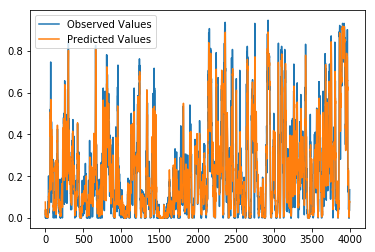

In [37]:
fig, ax = plt.subplots()
ax.plot(df_train.Energy[0:4000],label='Observed Values')
ax.plot(pd.DataFrame(pipe.predict(df_train))[0:4000],label='Predicted Values')
ax.legend()

# Performance of the model on the test dataset

In [38]:
r2_score(pipe.predict(df_test),df_test.Energy)

0.8167495069324298

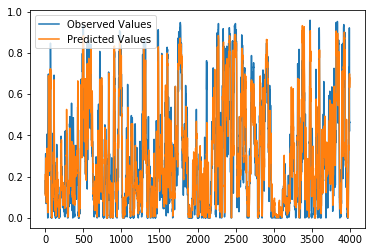

In [39]:
fig, ax = plt.subplots()
ax.plot(df_test.Energy[0:4000],label='Observed Values')
ax.plot(pd.DataFrame(pipe.predict(df_test))[0:4000],label='Predicted Values')
ax.legend()


# Conclusion

The results show that wind energy production at each hour strongly depends on the mean energy production. We also identified that a random regression model can reasonably help us to predict wind energy production.